Phakellia ventilabrum single-cell RNA seq (from ACME sn-multiomics experiment)

In [186]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad


/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


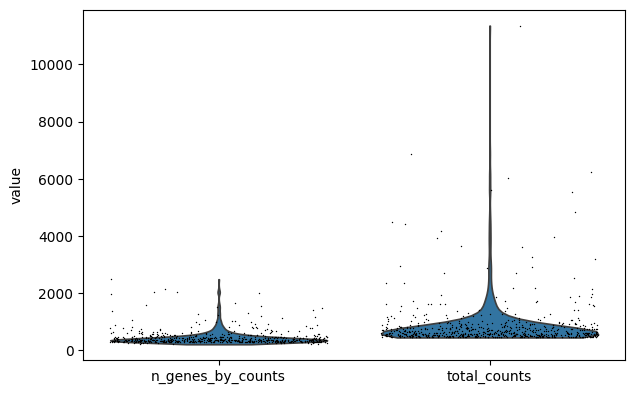

In [154]:
filtered_file="/Users/work/Library/Mobile Documents/com~apple~CloudDocs/Desktop/ADesktop/Studium/PhD/phakellia/filtered_feature_bc_matrix.h5"
adata_filtered = sc.read_10x_h5(filtered_file)
sc.pp.filter_cells(adata_filtered, min_genes=50)
sc.pp.filter_genes(adata_filtered, min_cells=3)
sc.pp.calculate_qc_metrics(adata_filtered, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata_filtered,["n_genes_by_counts", "total_counts"],jitter=0.4,multi_panel=False,)

In [155]:
adata_filtered

AnnData object with n_obs × n_vars = 656 × 6687
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [191]:
file="/Users/work/Library/Mobile Documents/com~apple~CloudDocs/Desktop/ADesktop/Studium/PhD/phakellia/raw_feature_bc_matrix"
adata = sc.read_10x_mtx(file)
adata

AnnData object with n_obs × n_vars = 251380 × 17042
    var: 'gene_ids', 'feature_types'

In [195]:
sc.pp.filter_cells(adata,min_counts=100)
sc.pp.filter_cells(adata,max_counts=8000)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
adata

AnnData object with n_obs × n_vars = 3555 × 7947
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

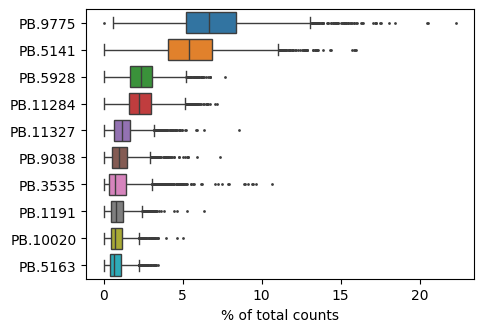

In [196]:
sc.pl.highest_expr_genes(adata, n_top=10)

/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


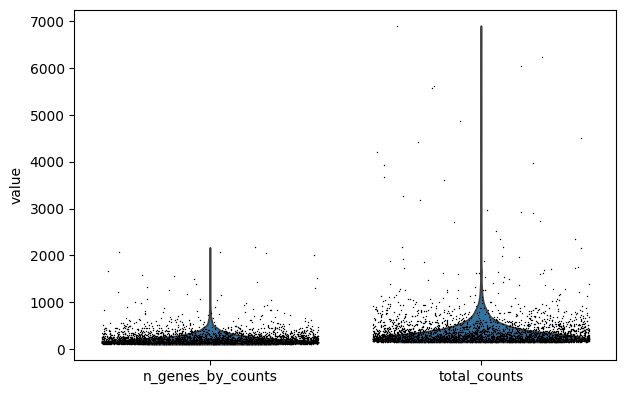

In [197]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata,["n_genes_by_counts", "total_counts"],jitter=0.4,multi_panel=False,)

In [110]:
adata

AnnData object with n_obs × n_vars = 1465 × 7301
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [111]:
sc.pp.normalize_total(adata)

In [112]:
sc.pp.log1p(adata)


In [113]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [114]:
adata.var["highly_variable"].value_counts()

highly_variable
False    6633
True      668
Name: count, dtype: int64

/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


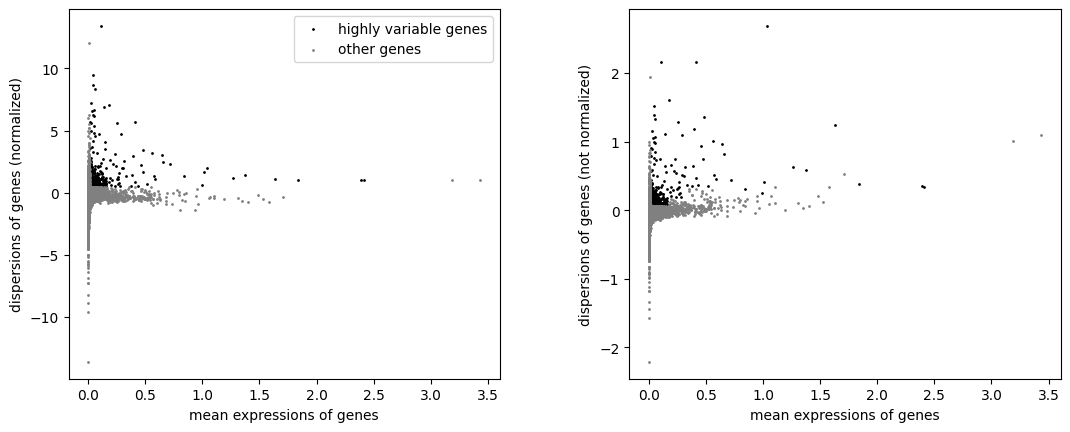

In [115]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [116]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

In [117]:
adata

AnnData object with n_obs × n_vars = 1465 × 7301
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [118]:
sc.pp.regress_out(adata, ["total_counts"])


In [119]:
sc.pp.scale(adata, max_value=10)


In [120]:
sc.tl.pca(adata, svd_solver="arpack")


In [121]:
adata.var

,gene_ids,feature_types,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
PB.2,PB.2,Gene Expression,27,27,0.018430,98.156997,27.0,False,0.014337,0.066600,0.489226,3.750719e-11,0.082440
PB.5,PB.5,Gene Expression,23,23,0.015700,98.430034,23.0,False,0.012013,-0.059661,-0.292349,3.750719e-11,0.073687
PB.8,PB.8,Gene Expression,120,120,0.084642,91.808874,124.0,False,0.064279,-0.092141,-0.493409,5.721436e-12,0.168530
PB.10,PB.10,Gene Expression,3,3,0.002048,99.795222,3.0,False,0.001963,0.095417,0.667610,2.508840e-11,0.030931
PB.11,PB.11,Gene Expression,10,10,0.006826,99.317406,10.0,False,0.006734,0.156532,1.045925,9.151317e-11,0.057817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PB.17020,PB.17020,Gene Expression,5,5,0.003413,99.658703,5.0,False,0.003275,0.147480,0.989892,1.838235e-12,0.040342
PB.17021,PB.17021,Gene Expression,9,9,0.006143,99.385666,9.0,False,0.002746,-0.310794,-1.846911,2.876611e-11,0.031938
PB.17024,PB.17024,Gene Expression,5,5,0.003413,99.658703,5.0,False,0.003305,0.319010,2.051693,-6.670042e-12,0.041755
PB.17031,PB.17031,Gene Expression,23,23,0.015700,98.430034,23.0,False,0.012921,-0.019517,-0.043853,3.718933e-11,0.077242


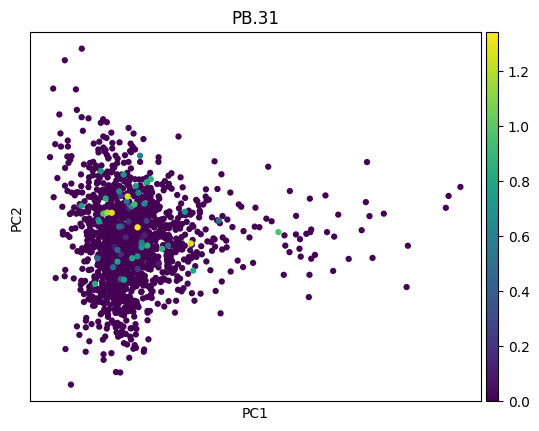

In [122]:
sc.pl.pca(adata, color="PB.31")


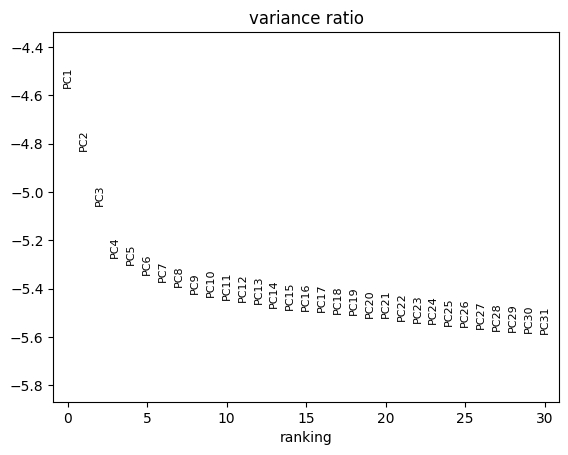

In [123]:
sc.pl.pca_variance_ratio(adata, log=True)


In [131]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)


In [132]:
adata

AnnData object with n_obs × n_vars = 1465 × 7301
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [125]:
sc.tl.paga(adata)
sc.pl.paga(adata)

ValueError: You need to run `tl.leiden` or `tl.louvain` to compute community labels, or specify `groups='an_existing_key'`

In [133]:
sc.tl.umap(adata)
sc.tl.leiden(adata,resolution=0.5)
sc.tl.umap(adata,random_state=1)


In [139]:
adata.var

,gene_ids,feature_types,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
PB.2,PB.2,Gene Expression,27,27,0.018430,98.156997,27.0,False,0.014337,0.066600,0.489226,3.750719e-11,0.082440
PB.5,PB.5,Gene Expression,23,23,0.015700,98.430034,23.0,False,0.012013,-0.059661,-0.292349,3.750719e-11,0.073687
PB.8,PB.8,Gene Expression,120,120,0.084642,91.808874,124.0,False,0.064279,-0.092141,-0.493409,5.721436e-12,0.168530
PB.10,PB.10,Gene Expression,3,3,0.002048,99.795222,3.0,False,0.001963,0.095417,0.667610,2.508840e-11,0.030931
PB.11,PB.11,Gene Expression,10,10,0.006826,99.317406,10.0,False,0.006734,0.156532,1.045925,9.151317e-11,0.057817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PB.17020,PB.17020,Gene Expression,5,5,0.003413,99.658703,5.0,False,0.003275,0.147480,0.989892,1.838235e-12,0.040342
PB.17021,PB.17021,Gene Expression,9,9,0.006143,99.385666,9.0,False,0.002746,-0.310794,-1.846911,2.876611e-11,0.031938
PB.17024,PB.17024,Gene Expression,5,5,0.003413,99.658703,5.0,False,0.003305,0.319010,2.051693,-6.670042e-12,0.041755
PB.17031,PB.17031,Gene Expression,23,23,0.015700,98.430034,23.0,False,0.012921,-0.019517,-0.043853,3.718933e-11,0.077242


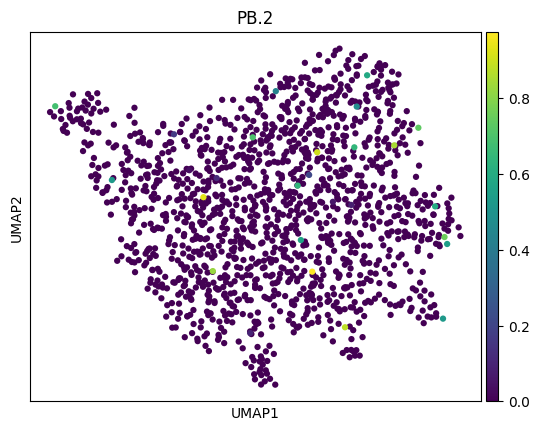

In [140]:
sc.pl.umap(adata, legend_loc="right margin",color="PB.2",use_raw=True)

/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/work/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


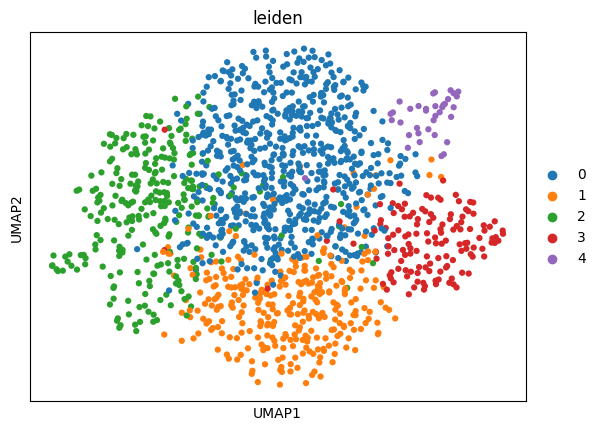

In [ ]:
sc.pl.umap(adata, legend_loc="right margin",color="leiden",use_raw=False)